In [120]:
import netCDF4
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import os
import math

## Load variables

In [182]:
#set variables to plot
common_vars = ['time','DEPTH']
vars_to_plot = ['LAT','LON','SALT','WTR_TEM']

#set input file and out directory
gps_data_file = ("http://thredds.socib.es/thredds/dodsC/research_vessel/gps/socib_rv-scb_pos001/L1/2019/07/dep0062_socib-rv_scb-pos001_L1_2019-07-30.nc")
tsl_data_file = ("http://thredds.socib.es/thredds/dodsC/research_vessel/thermosalinometer/socib_rv-scb_tsl001/L1/2019/07/dep0058_socib-rv_scb-tsl001_L1_2019-07-30.nc")
met_data_file = ("http://thredds.socib.es/thredds/dodsC/research_vessel/weather_station/socib_rv-scb_met009/L1/2019/07/dep0059_socib-rv_scb-met009_L1_2019-07-30.nc")
adcp_data_file = ("http://thredds.socib.es/thredds/dodsC/research_vessel/current_profiler/socib_rv-scb_rdi001/L1/2019/dep0027_socib-rv_scb-rdi001_L1_2019-07.nc")
#file_name = data_file.split('/', -1)[-1] #split path and select filename
#create path to save figures and statsFile
out_path = '/home/cmunoz/Desktop/test_gps_data/'
if not os.path.exists(os.path.dirname(out_path)):
    try:
        os.makedirs(os.path.dirname(out_path))
    except OSError as exc: # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise

with netCDF4.Dataset(adcp_data_file) as nc:
    
    #import metadata from NetCDF file
    title = nc.getncattr('title')
    abstract = nc.getncattr('abstract')
    featureType = nc.getncattr('featureType')
  
    #import dimension variables from NetCDF file
    time = nc.variables['time'][:]
    time_units = nc.variables['time'].units
    timeConverted = netCDF4.num2date(time, time_units)

    #load variables
    adcp_lat = nc.variables['LAT'][:]
    adcp_lon = nc.variables['LON'][:]
    
with netCDF4.Dataset(gps_data_file) as nc:
    
    #import metadata from NetCDF file
    title = nc.getncattr('title')
    abstract = nc.getncattr('abstract')
    featureType = nc.getncattr('featureType')
  
    #import dimension variables from NetCDF file
    time = nc.variables['time'][:]
    time_units = nc.variables['time'].units
    timeConverted = netCDF4.num2date(time, time_units)

    #load variables
    gps_lat = nc.variables['LAT'][:]
    gps_lon = nc.variables['LON'][:]

with netCDF4.Dataset(tsl_data_file) as nc:
    
    #import metadata from NetCDF file
    title = nc.getncattr('title')
    abstract = nc.getncattr('abstract')
    featureType = nc.getncattr('featureType')
  
    #import dimension variables from NetCDF file
    time = nc.variables['time'][:]
    time_units = nc.variables['time'].units
    timeConverted = netCDF4.num2date(time, time_units)

    #load variables
    tsl_lat = nc.variables['LAT'][:]
    tsl_lon = nc.variables['LON'][:]
    tsl_psal = nc.variables['SALT'][:]
    tsl_temp = nc.variables['WTR_TEM'][:]
    
with netCDF4.Dataset(met_data_file) as nc:
    
    #import metadata from NetCDF file
    title = nc.getncattr('title')
    abstract = nc.getncattr('abstract')
    featureType = nc.getncattr('featureType')
  
    #import dimension variables from NetCDF file
    time = nc.variables['time'][:]
    time_units = nc.variables['time'].units
    timeConverted = netCDF4.num2date(time, time_units)

    #load variables
    met_lat = nc.variables['LAT'][:]
    met_lon = nc.variables['LON'][:]
    met_wind_spe = nc.variables['WIN_SPE'][:]
    met_wind_dir = nc.variables['WIN_DIR'][:]

x_wind = np.empty(len(met_wind_spe))
x_wind[:] = np.nan
y_wind = x_wind

for i in range(0,len(met_wind_dir)):
    #x_wind[i] = math.cos(math.radians(met_wind_dir[i]))*met_wind_spe[i]
    #y_wind[i] = math.sin(math.radians(met_wind_dir[i]))*met_wind_spe[i]
    x_wind[i] = math.cos(math.radians(met_wind_dir[i]))
    y_wind[i] = math.sin(math.radians(met_wind_dir[i]))
x_wind = x_wind[1::2]
y_wind = y_wind[1::2]
met_lon = met_lon[1::2]
met_lat = met_lat[1::2]
met_wind_spe = met_wind_spe[1::2]

## Plot GPS trajectory

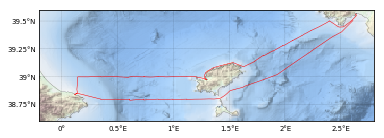

In [183]:
map = Basemap(projection='merc',llcrnrlon=-0.2,llcrnrlat=38.6,urcrnrlon=2.8,urcrnrlat=39.6,resolution='f',epsg=4326)
map.drawcoastlines(linewidth=0.15)
map.drawstates()
map.drawcountries()
wms_server='https://ows.emodnet-bathymetry.eu/wms'
map.wmsimage(wms_server, layers=["mean_atlas_land"])
#map.drawmapboundary(fill_color='#d4fafa')   
#map.fillcontinents(color='#ddaa66')
parallels = np.arange(30,50,0.25) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(-0.5,5,0.5) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=7,linewidth=0.15)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=7,linewidth=0.15)

#x, y = map(gps_lon, gps_lat)
x, y = map(adcp_lon, adcp_lat)
#Plot the points on the map
plt.plot(x,y,linewidth=0.5, linestyle="-", c="red")

#plt.show()
plt.savefig(out_path +'real_track.png', format='png', dpi=800)

## Plot Salinity TSL trajectory

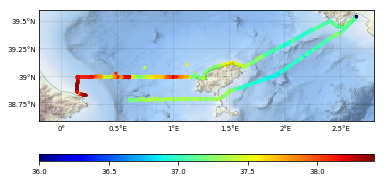

In [108]:
map = Basemap(projection='merc',llcrnrlon=-0.2,llcrnrlat=38.6,urcrnrlon=2.8,urcrnrlat=39.6,resolution='f',epsg=4326)
map.drawcoastlines(linewidth=0.15)
map.drawstates()
map.drawcountries()
wms_server='https://ows.emodnet-bathymetry.eu/wms'
map.wmsimage(wms_server, layers=["mean_atlas_land"])
#map.drawmapboundary(fill_color='#d4fafa')   
#map.fillcontinents(color='#ddaa66')
parallels = np.arange(30,50,0.25) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(-0.5,5,0.5) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=7,linewidth=0.15)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=7,linewidth=0.15)

x, y = map(tsl_lon, tsl_lat)

#Plot the points on the map
plt.scatter(x,y,c=tsl_psal,vmin=36, vmax=np.nanmax(tsl_psal), cmap='jet', s=5)
cbar = plt.colorbar(orientation='horizontal',aspect=50)
cbar.ax.tick_params(labelsize=7)

#plt.show()
plt.savefig(out_path +'psal_track.png', format='png', dpi=800)

## Plot Temperature TSL trajectory

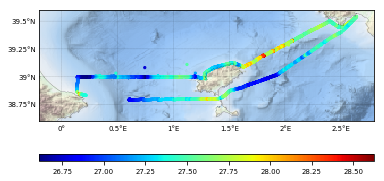

In [111]:
map = Basemap(projection='merc',llcrnrlon=-0.2,llcrnrlat=38.6,urcrnrlon=2.8,urcrnrlat=39.6,resolution='f',epsg=4326)
map.drawcoastlines(linewidth=0.15)
map.drawstates()
map.drawcountries()
wms_server='https://ows.emodnet-bathymetry.eu/wms'
map.wmsimage(wms_server, layers=["mean_atlas_land"])
#map.drawmapboundary(fill_color='#d4fafa')   
#map.fillcontinents(color='#ddaa66')
parallels = np.arange(30,50,0.25) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(-0.5,5,0.5) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=7,linewidth=0.15)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=7,linewidth=0.15)

x, y = map(tsl_lon, tsl_lat)

#Plot the points on the map
plt.scatter(x,y,c=tsl_temp,vmin=np.nanmin(tsl_temp), vmax=np.nanmax(tsl_temp), cmap='jet', s=5)
cbar = plt.colorbar(orientation='horizontal',aspect=50)
cbar.ax.tick_params(labelsize=7)

#plt.show()
plt.savefig(out_path +'temp_track.png', format='png', dpi=800)

## Plot Wind speed and direction MET trajectory

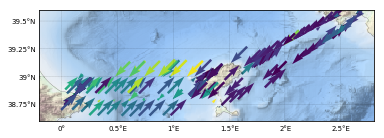

In [179]:
map = Basemap(projection='merc',llcrnrlon=-0.2,llcrnrlat=38.6,urcrnrlon=2.8,urcrnrlat=39.6,resolution='f',epsg=4326)
map.drawcoastlines(linewidth=0.15)
map.drawstates()
map.drawcountries()
wms_server='https://ows.emodnet-bathymetry.eu/wms'
map.wmsimage(wms_server, layers=["mean_atlas_land"])
#map.drawmapboundary(fill_color='#d4fafa')   
#map.fillcontinents(color='#ddaa66')
parallels = np.arange(30,50,0.25) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(-0.5,5,0.5) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=7,linewidth=0.15)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=7,linewidth=0.15)

x, y = map(met_lon, met_lat)

#Plot the points on the map
map.quiver(x,y,x_wind,y_wind,met_wind_spe, units='y', pivot='tip', width=0.022,scale=1/ 0.15)

#plt.show()
plt.savefig(out_path +'wind_track.png', format='png', dpi=800)

## Plot VM-ADCP trajectory